In [11]:

import csv
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_ini = pd.read_csv('all_reviews_fr_clean.csv',sep=';')


def labeliser_binaire(note):
    if note<=3:
        return -1
    elif note>3:
        return 1


notes_labelisees = []
for i in range(0,len(df_ini)):
    notes_labelisees.append(labeliser_binaire(df_ini['Note'][i]))
    
   
data = {'Titre':df_ini['Titre'],
        'NoteLabel':notes_labelisees,
        'DateVisite':df_ini['DateVisite'],
        'Commentaire':df_ini['Commentaire'],
        'restaurant':df_ini['restaurant']}

df = pd.DataFrame(data,columns =[ 'Titre', 'NoteLabel', 'DateVisite' , 'Commentaire','restaurant'] )




In [12]:


from nltk import word_tokenize

len_tokens = []
word_tokens = [word_tokenize(Commentaire) for Commentaire in df.Commentaire]
for i in range(len(word_tokens)):
    len_tokens.append(len(word_tokens[i]))
df['n_tokens'] = len_tokens
df.head()

nb_exclam = []
for commentaire in df.Commentaire:
    nb_exclam.append(commentaire.count('!'))
df['nb_exclam'] = nb_exclam

df_pos = df.loc[df['NoteLabel'] == 1]
df_neg = df.loc[df['NoteLabel'] == -1]


import pandas as pd
import csv
from sklearn.feature_extraction.text import CountVectorizer
from stop_words import get_stop_words
import nltk



In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
"""
df_neg_list = df_neg['Commentaire'].tolist()

sep = ''
comments_neg_string = sep.join(df_neg_list)


cloud_comments_neg_string = WordCloud().generate(comments_neg_string)
plt.imshow(cloud_comments_neg_string, interpolation='bilinear')
plt.axis('off')
plt.show()

"""

def hist_mots_importants(df_base,nb_features,ngram_range1,ngram_range2):
    stop_words = get_stop_words('fr')
    
    my_stop_words = nltk.corpus.stopwords.words('french')+stop_words+['cuisine','plats','restaurant','paris','table','endroit','brasserie']
    
    vect = CountVectorizer(stop_words=my_stop_words,max_features=nb_features,ngram_range=(ngram_range1, ngram_range2))
    vect.fit(df_base.Commentaire)
    X = vect.transform(df_base.Commentaire)
    
    
    # Transform to an array
    my_array = X.toarray()
    
    # Transform back to a dataframe, assign column names
    X_df = pd.DataFrame(my_array, columns=vect.get_feature_names())
    
    occurence = []
    mots = []
    for mot in X_df.columns:
        occurence.append(X_df[mot].sum())
        mots.append(mot)
    
    df_mot = pd.DataFrame({'mot':mots, 'occurence':occurence})
    df_mot_sorted = df_mot.sort_values('occurence')
    plt.figure(figsize=(30,7))
    plt.scatter(df_mot_sorted.mot,df_mot_sorted.occurence)
    #ax = df_mot_sorted.plot.bar(x='mot', y='occurence', rot=0,width=0.8)
    



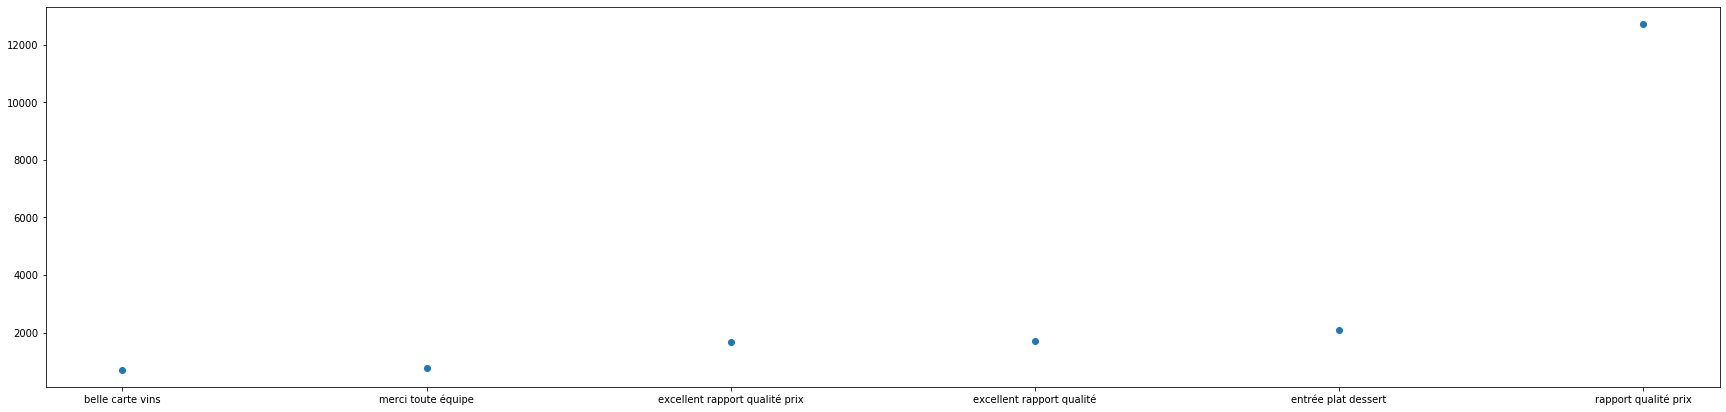

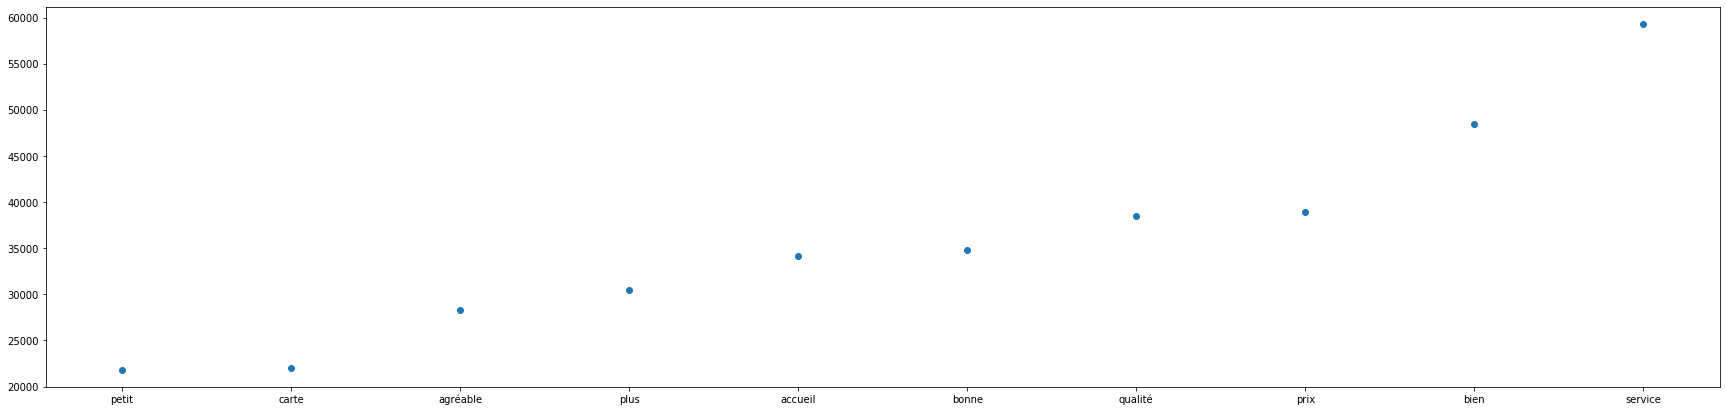

In [14]:

hist_mots_importants(df_pos,6,3,4)
hist_mots_importants(df_pos,10,1,2)

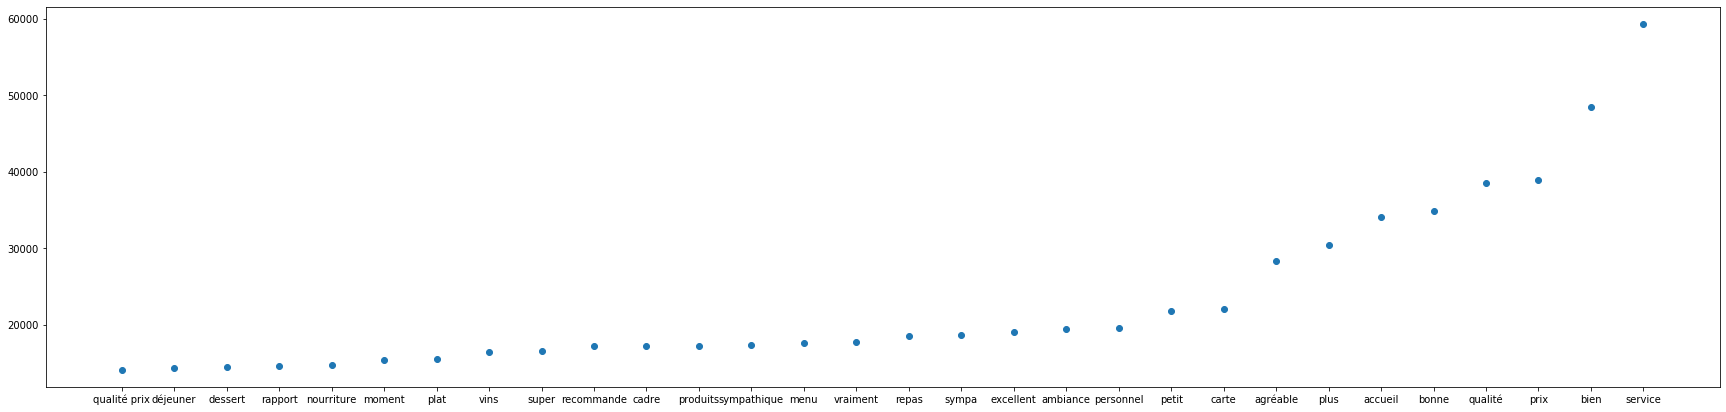

In [15]:

hist_mots_importants(df_pos,30,1,4)

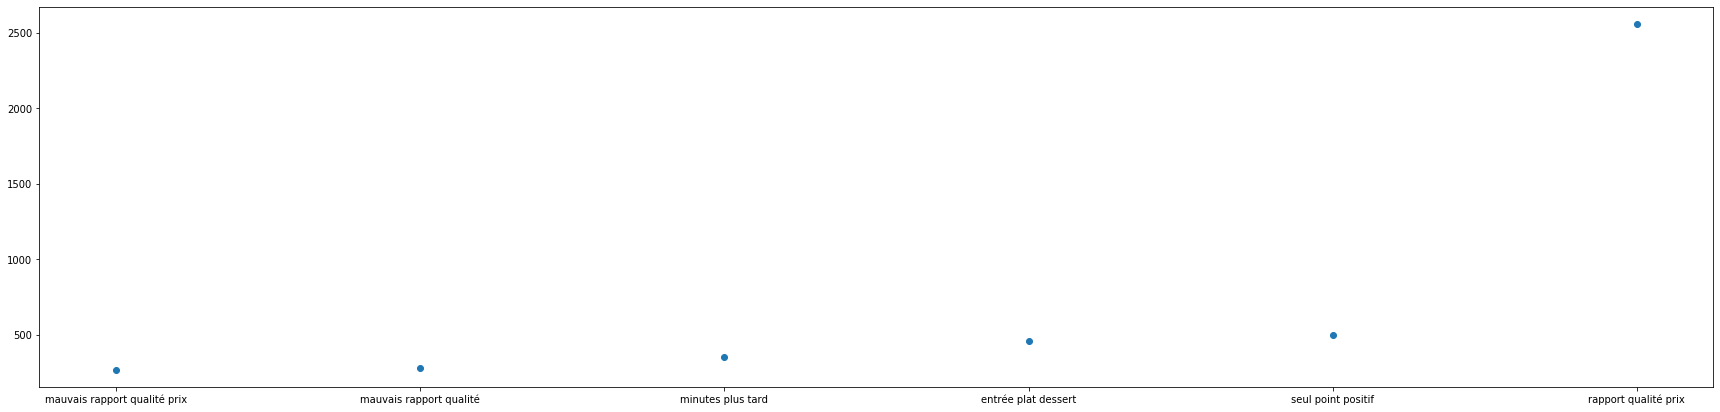

In [16]:
hist_mots_importants(df_neg,6,3,4)

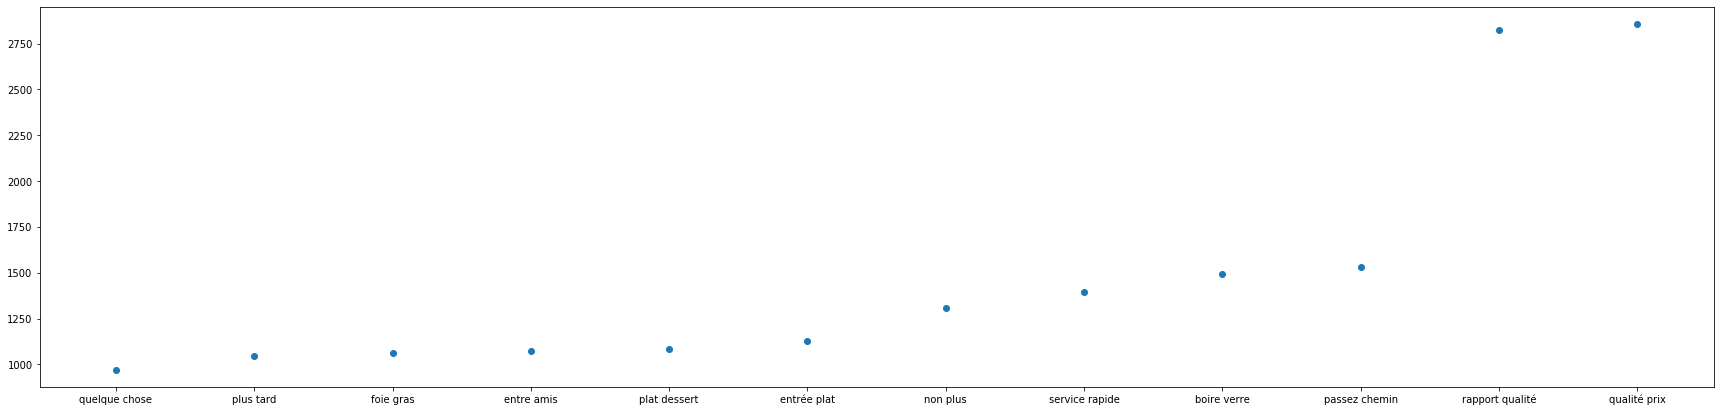

In [17]:
hist_mots_importants(df_neg,12,2,2)

In [18]:
df_neg.nb_exclam.describe()


count    67840.000000
mean         1.221197
std          2.656731
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         69.000000
Name: nb_exclam, dtype: float64

In [19]:
df_pos.nb_exclam.describe()


count    151585.000000
mean          0.974048
std           1.814197
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         137.000000
Name: nb_exclam, dtype: float64

pour negatif , 75% des commentaire ont 2 points d'exclamation alors que les autres 1.
Mais cela ne suffit pas en regardant la moyenne et l'ecart pour revateur du label.